In [33]:
# import MNIST
import tensorflow as tf
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import collections

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from keras import regularizers
from keras.callbacks import EarlyStopping

(X, Y), (X_test, Y_test) = mnist.load_data()

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=314159, test_size=0.2, shuffle=True, stratify=Y)
X_train = X_train.reshape((X_train.shape[0], 784)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 784)).astype('float32')
X_val = X_val.reshape((X_val.shape[0], 784)).astype('float32')

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_val = to_categorical(Y_val)

In [34]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

48000
10000
12000


600th image is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


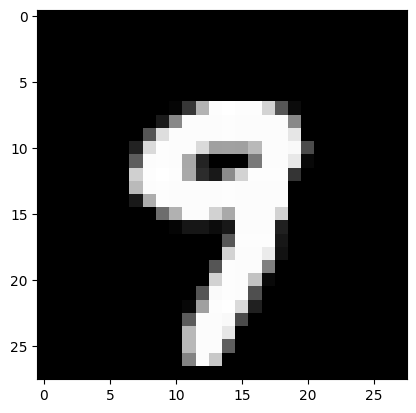

In [35]:
# visualize image
img_num = 600
print(f"{img_num}th image is:", Y_train[img_num])

first_image = X_train[img_num]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [38]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Additional hidden layer with L2 regularization
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# Train the model using the validation, keeping test data independent, using early stopping
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 1.9054 - accuracy: 0.8363 - val_loss: 0.6414 - val_accuracy: 0.8884
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4986 - accuracy: 0.9197 - val_loss: 0.4382 - val_accuracy: 0.9314
Epoch 3/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3741 - accuracy: 0.9441 - val_loss: 0.4272 - val_accuracy: 0.9322
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3200 - accuracy: 0.9510 - val_loss: 0.3231 - val_accuracy: 0.9498
Epoch 5/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2811 - accuracy: 0.9555 - val_loss: 0.2842 - val_accuracy: 0.9553
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2494 - accuracy: 0.9599 - val_loss: 0.2799 - val_accuracy: 0.9542
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2317 - accuracy: 0.9627 - val_loss: 0.3413 - val_ac

In [40]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Y_test, axis=1)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multiclass classification
print("Precision:", precision)

# Recall
recall = recall_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multiclass classification
print("Recall:", recall)

# F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multiclass classification
print("F1 Score:", f1)


313/313 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.92      0.98      0.95       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.95      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.93      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy: 0.966
Precision: 0.9662935312373633
Recall: 0.966
F1 Score: 0.9659969894393802


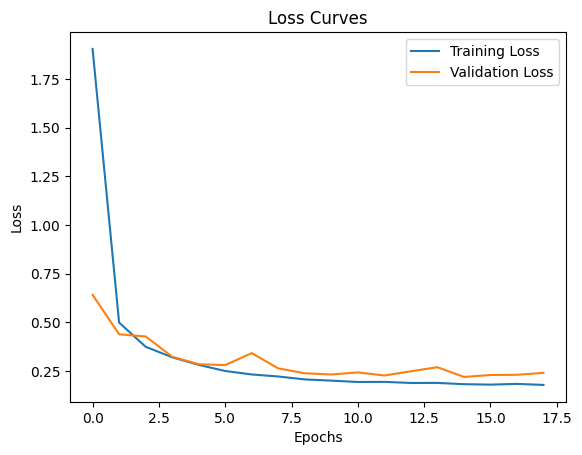

In [41]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
